In [38]:
## ---------------------------
##
## Coverage analysis - summary
##
## Combining and visualizing the results of the 01.9 parallelized script
## For each species a coverage_stats.tsv file is generated
## Authors: Daria Romanovskaia
##
## Date Created: 2021-11-04
##
##
## ---------------------------

In [39]:
source(file.path(Sys.getenv("CODEBASE"),"DNAmeth500species/src/00.0_init.R"))

Joining, by = "species"



In [149]:
wd = file.path(analysis_dir, "01_basicStats", "01.9_coverage_analysis")
setwd(wd)

In [150]:
getwd()

[1] "/binfl/lv71484/droman/DNAmeth500species/results_analysis/01_basicStats/01.9_coverage_analysis"

In [41]:
library(patchwork)

In [42]:
dir.create("summary")

Warning message in dir.create("summary"):
“'summary' already exists”


In [5]:
## collecting files with coverage information. We are mostly interested in columns N_rep and N_amp, that indicate the number of repeats

In [58]:
if(!file.exists( "summary/coverage_stats_combined.tsv")){
files = list.files(pattern = "coverage_stats.tsv", recursive = T)

coverage_stats_list <- sapply(files, fread, simplify = FALSE)

coverage_stats <- rbindlist(coverage_stats_list)

coverage_stats[, species:=strsplit(sample, "_")[[1]][1], by = row.names(coverage_stats)]

coverage_stats[, tissue:=strsplit(sample, "_")[[1]][3], by = row.names(coverage_stats)]

coverage_stats <- setDT(left_join(coverage_stats, sp_df))

coverage_stats[, individual := strsplit(sample, "_")[[1]][2], by = row.names(coverage_stats)]
    
coverage_stats[,N_rep_norm:=N_rep/N_frags,]
coverage_stats[,N_amp_norm:=N_amp/N_frags,]
coverage_stats[,N_ind_norm:=N_ind/N_frags,]
    
my_wt(coverage_stats, "summary/coverage_stats_combined.tsv")
}else coverage_stats <- fread( "summary/coverage_stats_combined.tsv")

In [61]:
head(coverage_stats)

sample,N_frags,total_cov,N_rep,N_single,N_ind,N_ind_bg,N_amp,species,tissue,color_class,group,individual,N_rep_norm,N_amp_norm,N_ind_norm
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
AB_1_H,1233503,13696054,7481,284636,241897,28393,14038,AB,H,Reptilia,Rep.,1,0.006064841,0.011380597,0.19610572
AB_1_L,1157846,17492828,7481,96665,60365,215161,3218,AB,L,Reptilia,Rep.,1,0.006461136,0.002779299,0.05213560
AB_2_L,1417575,14477953,7481,99863,105112,72956,6333,AB,L,Reptilia,Rep.,2,0.005277322,0.004467488,0.07414916
AB_2_LU,1181444,12308597,7481,88472,90793,42510,3884,AB,LU,Reptilia,Rep.,2,0.006332082,0.003287502,0.07684918
ABB_1_H,1414520,11970070,1821,208117,165151,140802,9876,ABB,H,Mammalia,Mam.,1,0.001287362,0.006981874,0.11675409
ABB_1_L,1088785,4563383,1821,198674,133225,33680,4759,ABB,L,Mammalia,Mam.,1,0.001672507,0.004370927,0.12236116


In [8]:
## normalizing the N_rep by the number of fragments

In [62]:
coverage_stats <- coverage_stats %>% 
    group_by(species) %>% 
    mutate(n_tissue = length(unique(tissue)), n_samples = n(), n_indiv = length(unique(individual))) %>%
    ungroup()

In [63]:
setDT(coverage_stats)

In [64]:
head(coverage_stats)

sample,N_frags,total_cov,N_rep,N_single,N_ind,N_ind_bg,N_amp,species,tissue,color_class,group,individual,N_rep_norm,N_amp_norm,N_ind_norm,n_tissue,n_samples,n_indiv
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
AB_1_H,1233503,13696054,7481,284636,241897,28393,14038,AB,H,Reptilia,Rep.,1,0.006064841,0.011380597,0.19610572,3,4,2
AB_1_L,1157846,17492828,7481,96665,60365,215161,3218,AB,L,Reptilia,Rep.,1,0.006461136,0.002779299,0.05213560,3,4,2
AB_2_L,1417575,14477953,7481,99863,105112,72956,6333,AB,L,Reptilia,Rep.,2,0.005277322,0.004467488,0.07414916,3,4,2
AB_2_LU,1181444,12308597,7481,88472,90793,42510,3884,AB,LU,Reptilia,Rep.,2,0.006332082,0.003287502,0.07684918,3,4,2
ABB_1_H,1414520,11970070,1821,208117,165151,140802,9876,ABB,H,Mammalia,Mam.,1,0.001287362,0.006981874,0.11675409,3,4,2
ABB_1_L,1088785,4563383,1821,198674,133225,33680,4759,ABB,L,Mammalia,Mam.,1,0.001672507,0.004370927,0.12236116,3,4,2


In [67]:
coverage_stats_m <- melt(coverage_stats[,c("N_rep_norm", "N_amp_norm", "N_ind_norm","sample", "n_tissue","n_samples", "n_indiv","color_class")],
     measure.vars = c("N_rep_norm", "N_amp_norm",  "N_ind_norm"))

In [91]:

p1 <- ggplot(coverage_stats_m, aes(x = as.factor(n_tissue), y = value, color = color_class)) + 
    geom_jitter() + facet_grid(~variable) + 
    scale_color_manual(values = class_colors) + theme(legend.position = "None")

p2 <- ggplot(coverage_stats_m, aes(x = as.factor(n_samples), y = value, color = color_class)) + 
    geom_jitter() + facet_grid(~variable) + 
    scale_color_manual(values = class_colors) + theme(legend.position = "None") + geom_vline(xintercept = 3.5, linetype = "dashed")

p3 <- ggplot(coverage_stats_m, aes(x = as.factor(n_indiv), y = value, color = color_class)) + 
    geom_jitter() + facet_grid(~variable) + 
    scale_color_manual(values = class_colors) + theme(legend.position = "None")+ geom_vline(xintercept = 1.5, linetype = "dashed")


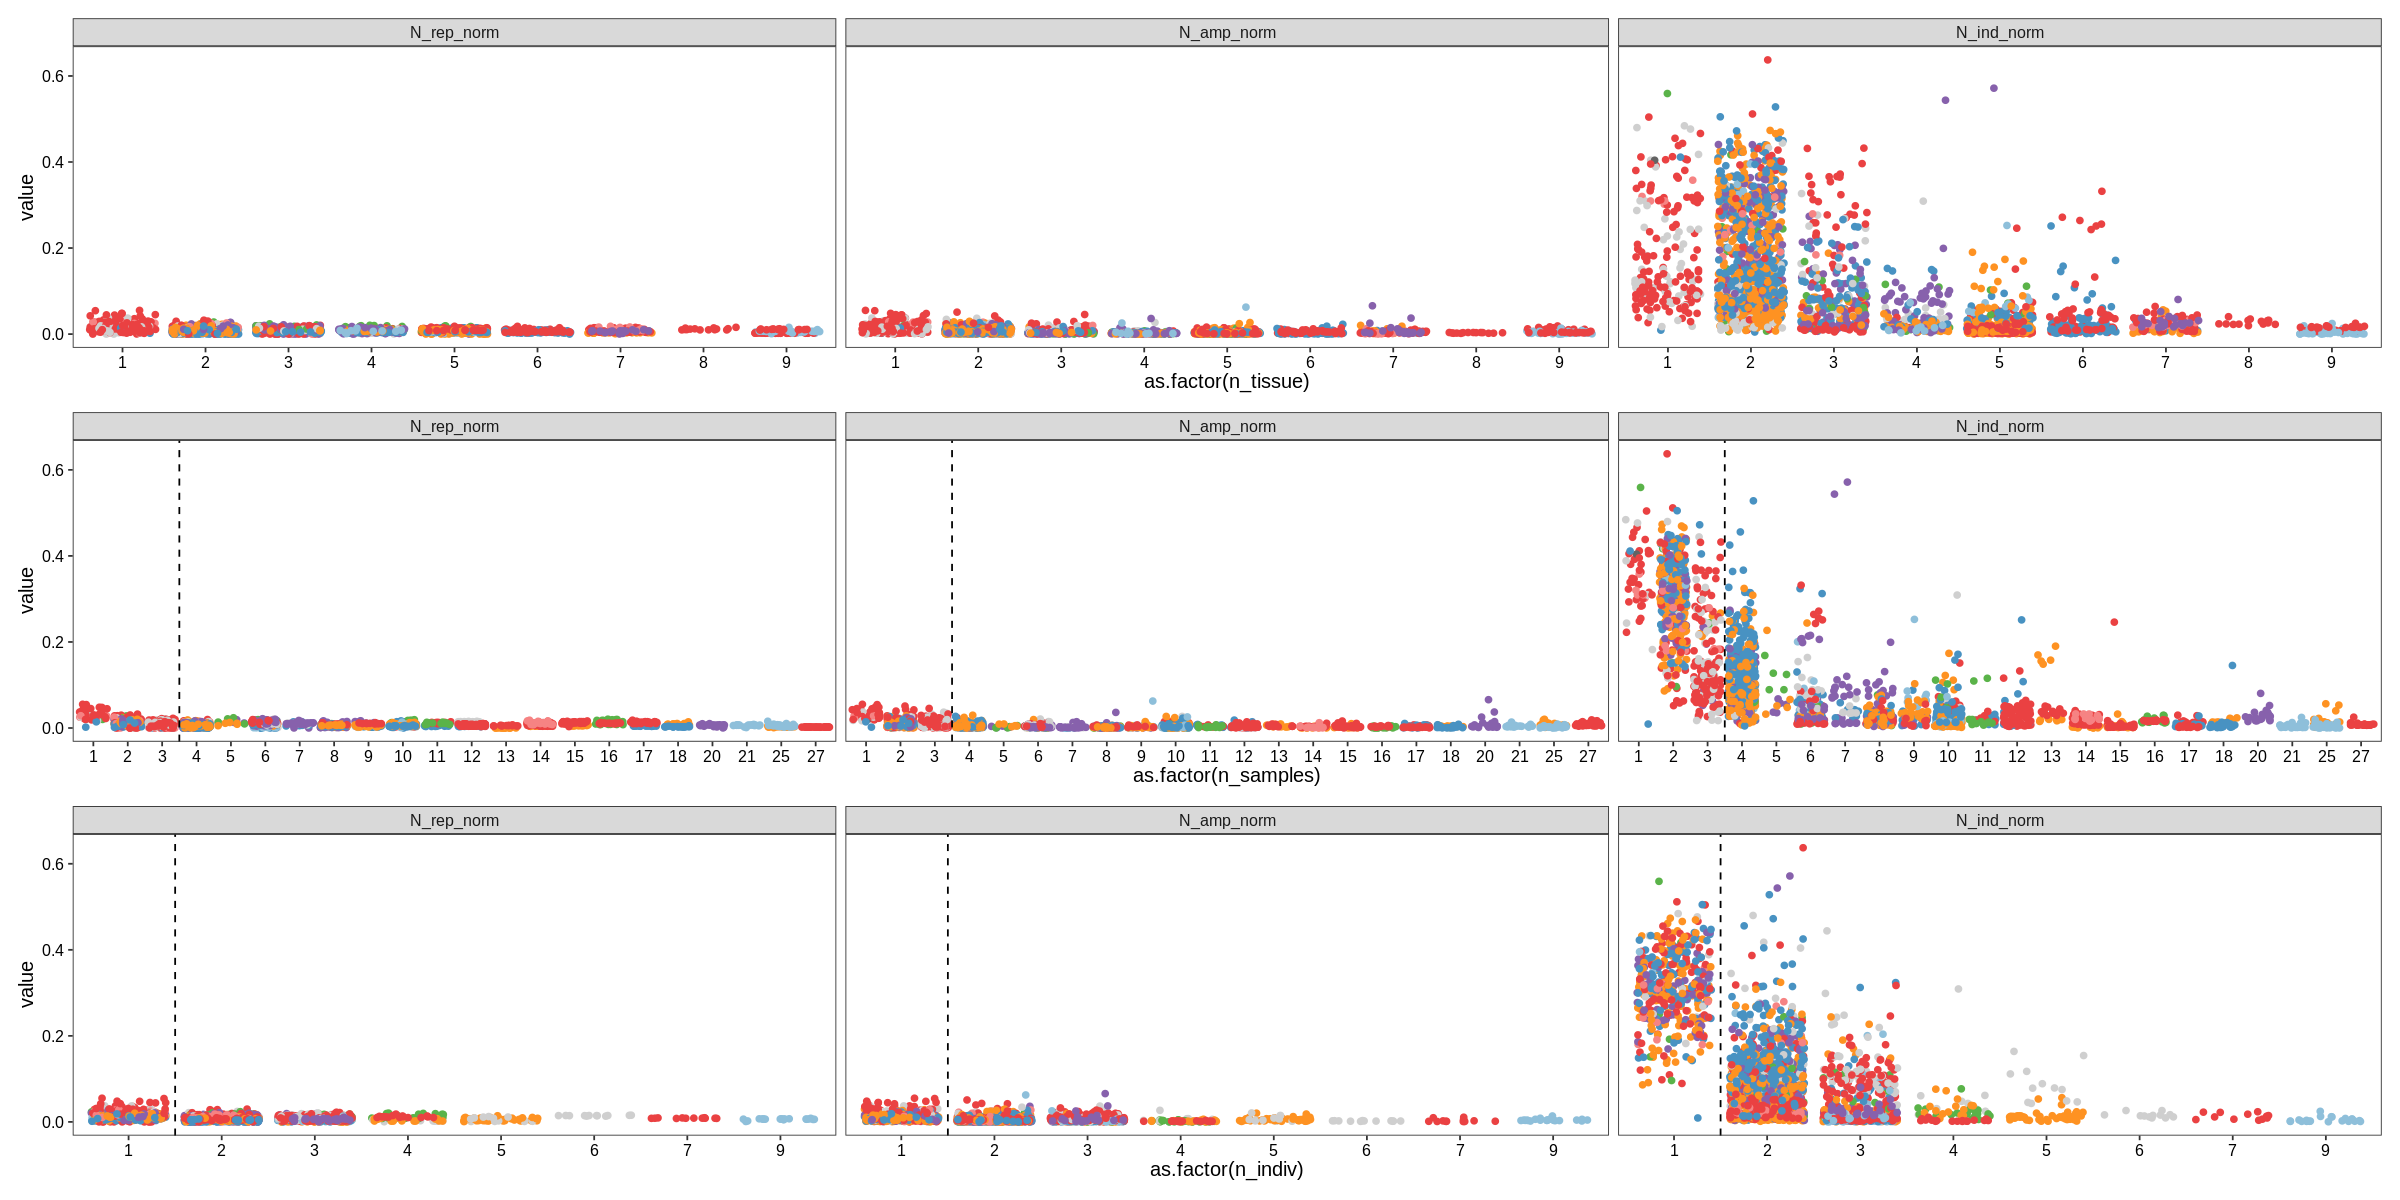

In [92]:
options(repr.plot.width=20, repr.plot.height = 10)
g <- p1/p2/p3
g

In [93]:
ggsave("summary/stats_biases.pdf",g, width = 20, height = 10)

Thresholds:  
1) n_indiv > 1  
2) n_samples > 3

In [94]:
coverage_stats_filtered <- coverage_stats[n_indiv > 1 & n_samples >3]

In [95]:
NROW(coverage_stats_filtered)

[1] 1833

In [96]:
NROW(coverage_stats)

[1] 2444

In [97]:
is_outlier <- function(x) {
  return(x < quantile(x, 0.25) - 1.5 * IQR(x) | x > quantile(x, 0.75) + 1.5 * IQR(x))
}

In [102]:
class_short

Invertebrata Jawless_vertebrate     Chondrichthyes        Actinopteri 
            "Inv."           "Jl.vb."              "Ch."             "Act." 
          Amphibia           Reptilia               Aves        Marsupialia 
            "Amp."             "Rep."              "Av."             "Mar." 
          Mammalia 
            "Mam."

In [110]:
coverage_stats_filtered$group <- factor(coverage_stats_filtered$group, levels = class_short)

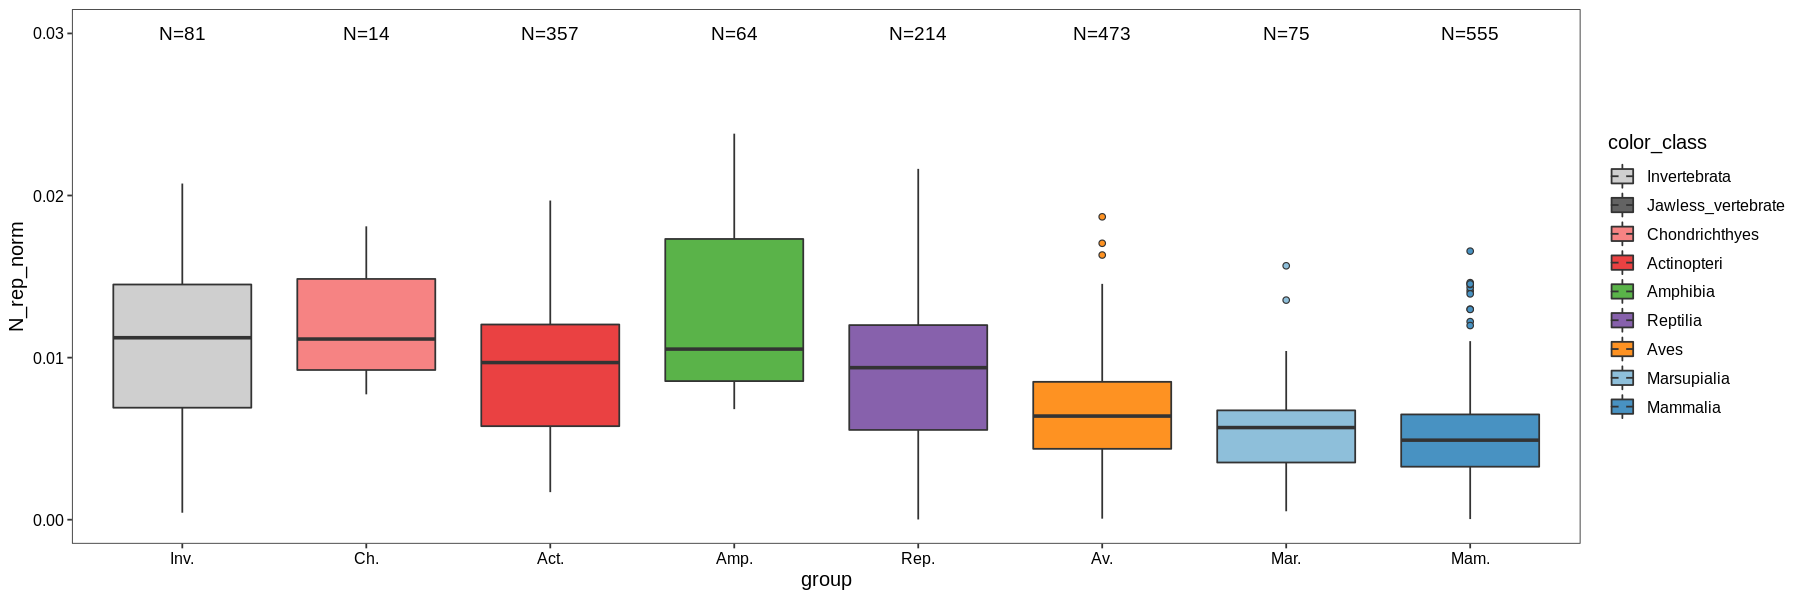

In [152]:
options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(unique(coverage_stats_filtered[color_class!="Jawless_vertebrate", c("species", "color_class", "N_rep_norm", "group")]), aes(x = group, y = N_rep_norm,fill = color_class)) + 
    geom_boxplot(outlier.shape = 21) + 
    geom_point(data = unique(coverage_stats_filtered[color_class=="Jawless_vertebrate"]),  aes(x = group, y = N_rep_norm,color = color_class)) + 
    scale_fill_manual(values = class_colors) + scale_color_manual(values = class_colors) + 
    stat_summary(fun.data = give.n,fun.args = c(y=0.03), geom = "text",size=4)

In [153]:
ggsave("summary/stats_N_rep_norm.pdf", width = 8, height = 4)

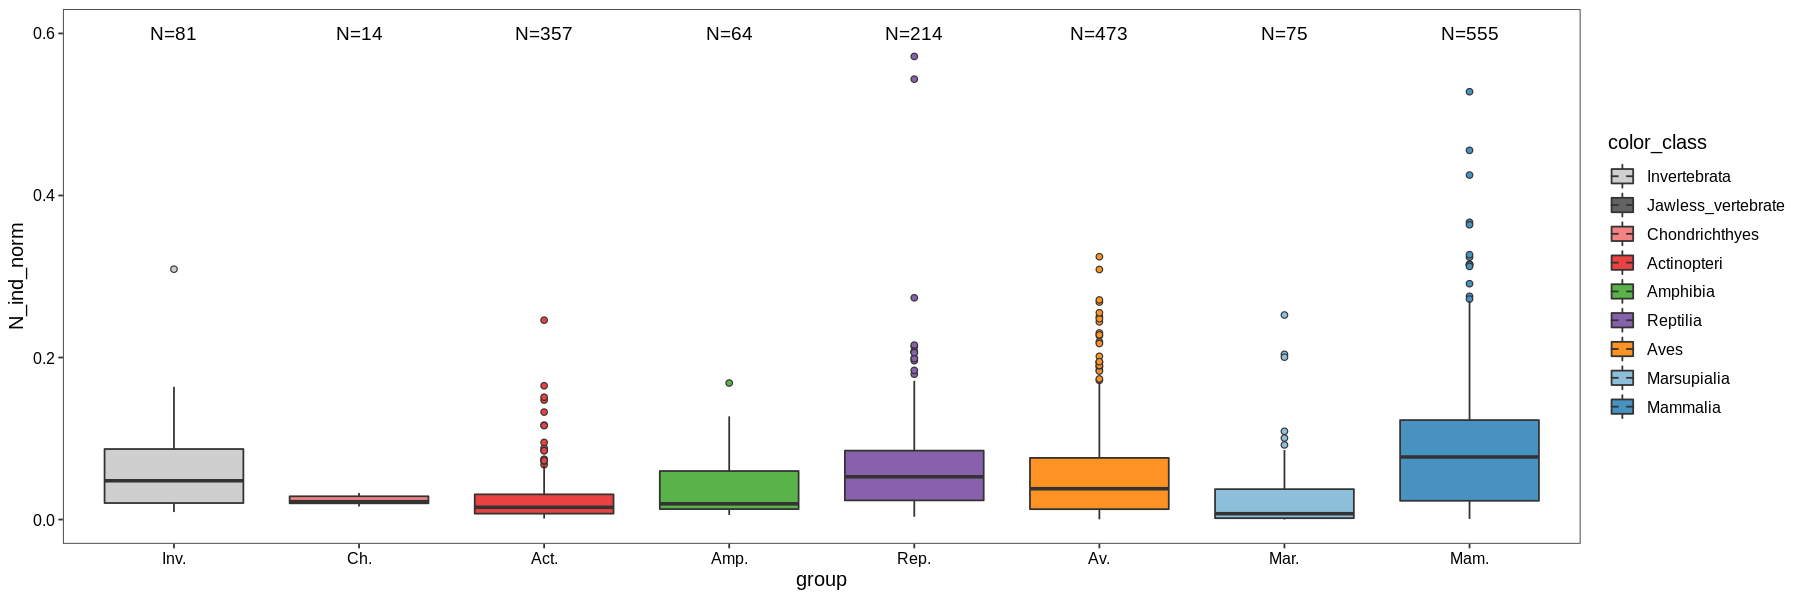

In [155]:
options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(unique(coverage_stats_filtered), aes(x = group, y = N_ind_norm,fill = color_class)) + 
    geom_boxplot(outlier.shape = 21) + 
    geom_point(data =coverage_stats_filtered[color_class=="Jawless_vertebrate"],  aes(x = group, y = N_ind_norm,color = color_class)) + 
    scale_fill_manual(values = class_colors) + scale_color_manual(values = class_colors) + 
    stat_summary(fun.data = give.n,fun.args = c(y=0.6), geom = "text",size=4)
ggsave("summary/stats_N_ind_norm.pdf", width = 8, height = 4)

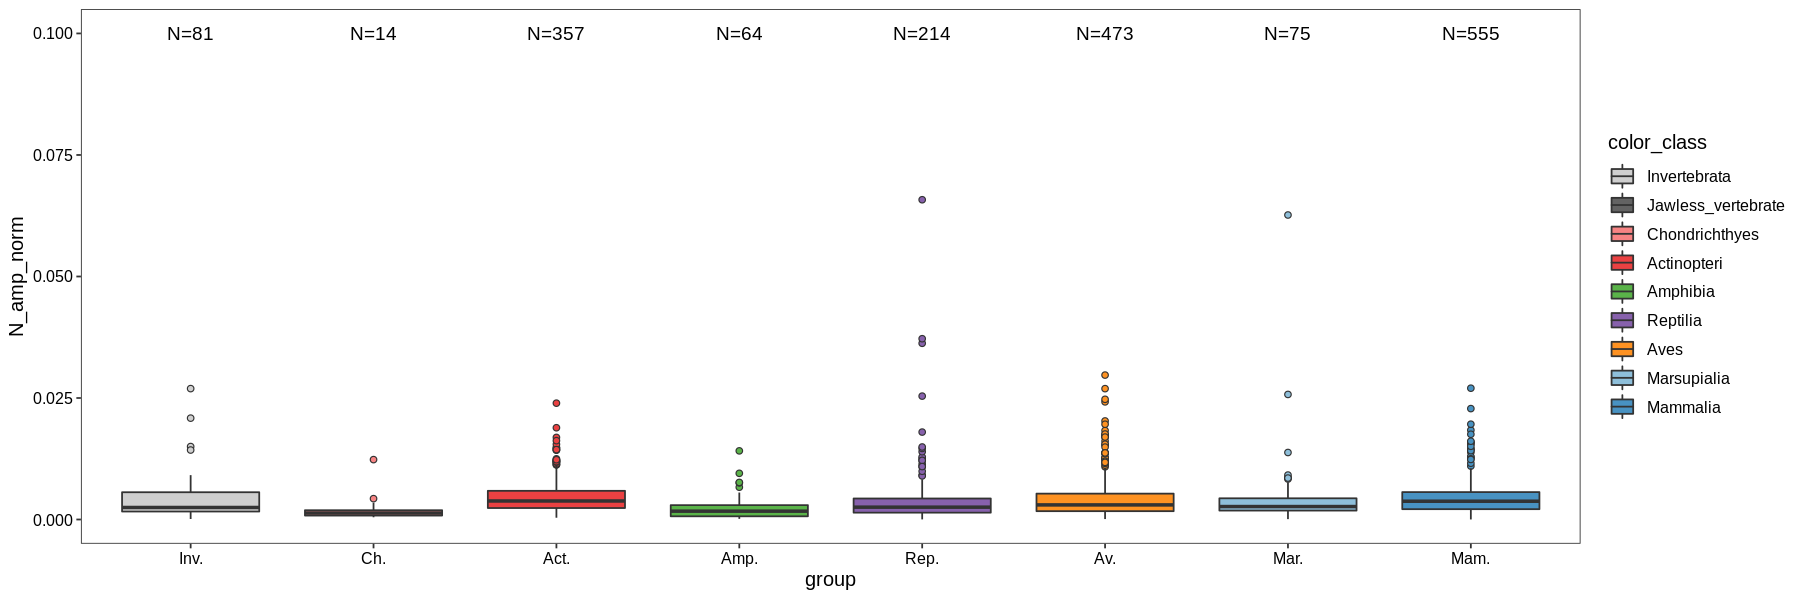

In [156]:
options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(unique(coverage_stats_filtered), aes(x = group, y = N_amp_norm,fill = color_class)) + 
    geom_boxplot(outlier.shape = 21) + 
    scale_fill_manual(values = class_colors) + scale_color_manual(values = class_colors) + 
    stat_summary(fun.data = give.n,fun.args = c(y=0.1), geom = "text",size=4)
ggsave("summary/stats_N_amp_norm.pdf", width = 8, height = 4)

Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


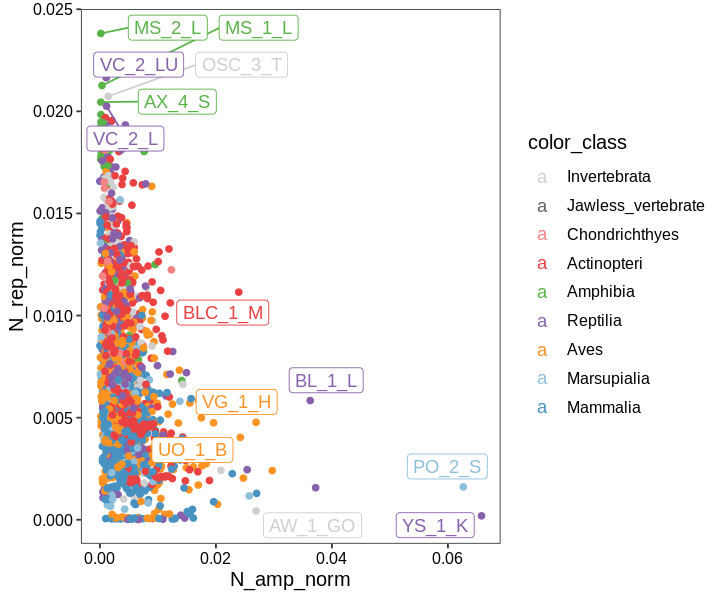

In [157]:
options(repr.plot.width = 6, repr.plot.height = 5)
ggplot(coverage_stats_filtered, aes(x = N_amp_norm, y = N_rep_norm, color = color_class)) + 
    geom_point() + scale_color_manual(values = class_colors) + 
    geom_label_repel(data = coverage_stats_filtered[N_amp_norm>0.02 | N_rep_norm > 0.02, ], aes(x = N_amp_norm, y = N_rep_norm, label = sample))

ggsave("summary/stats_N_rep_vs_amp_norm.pdf", width = 6, height = 4)

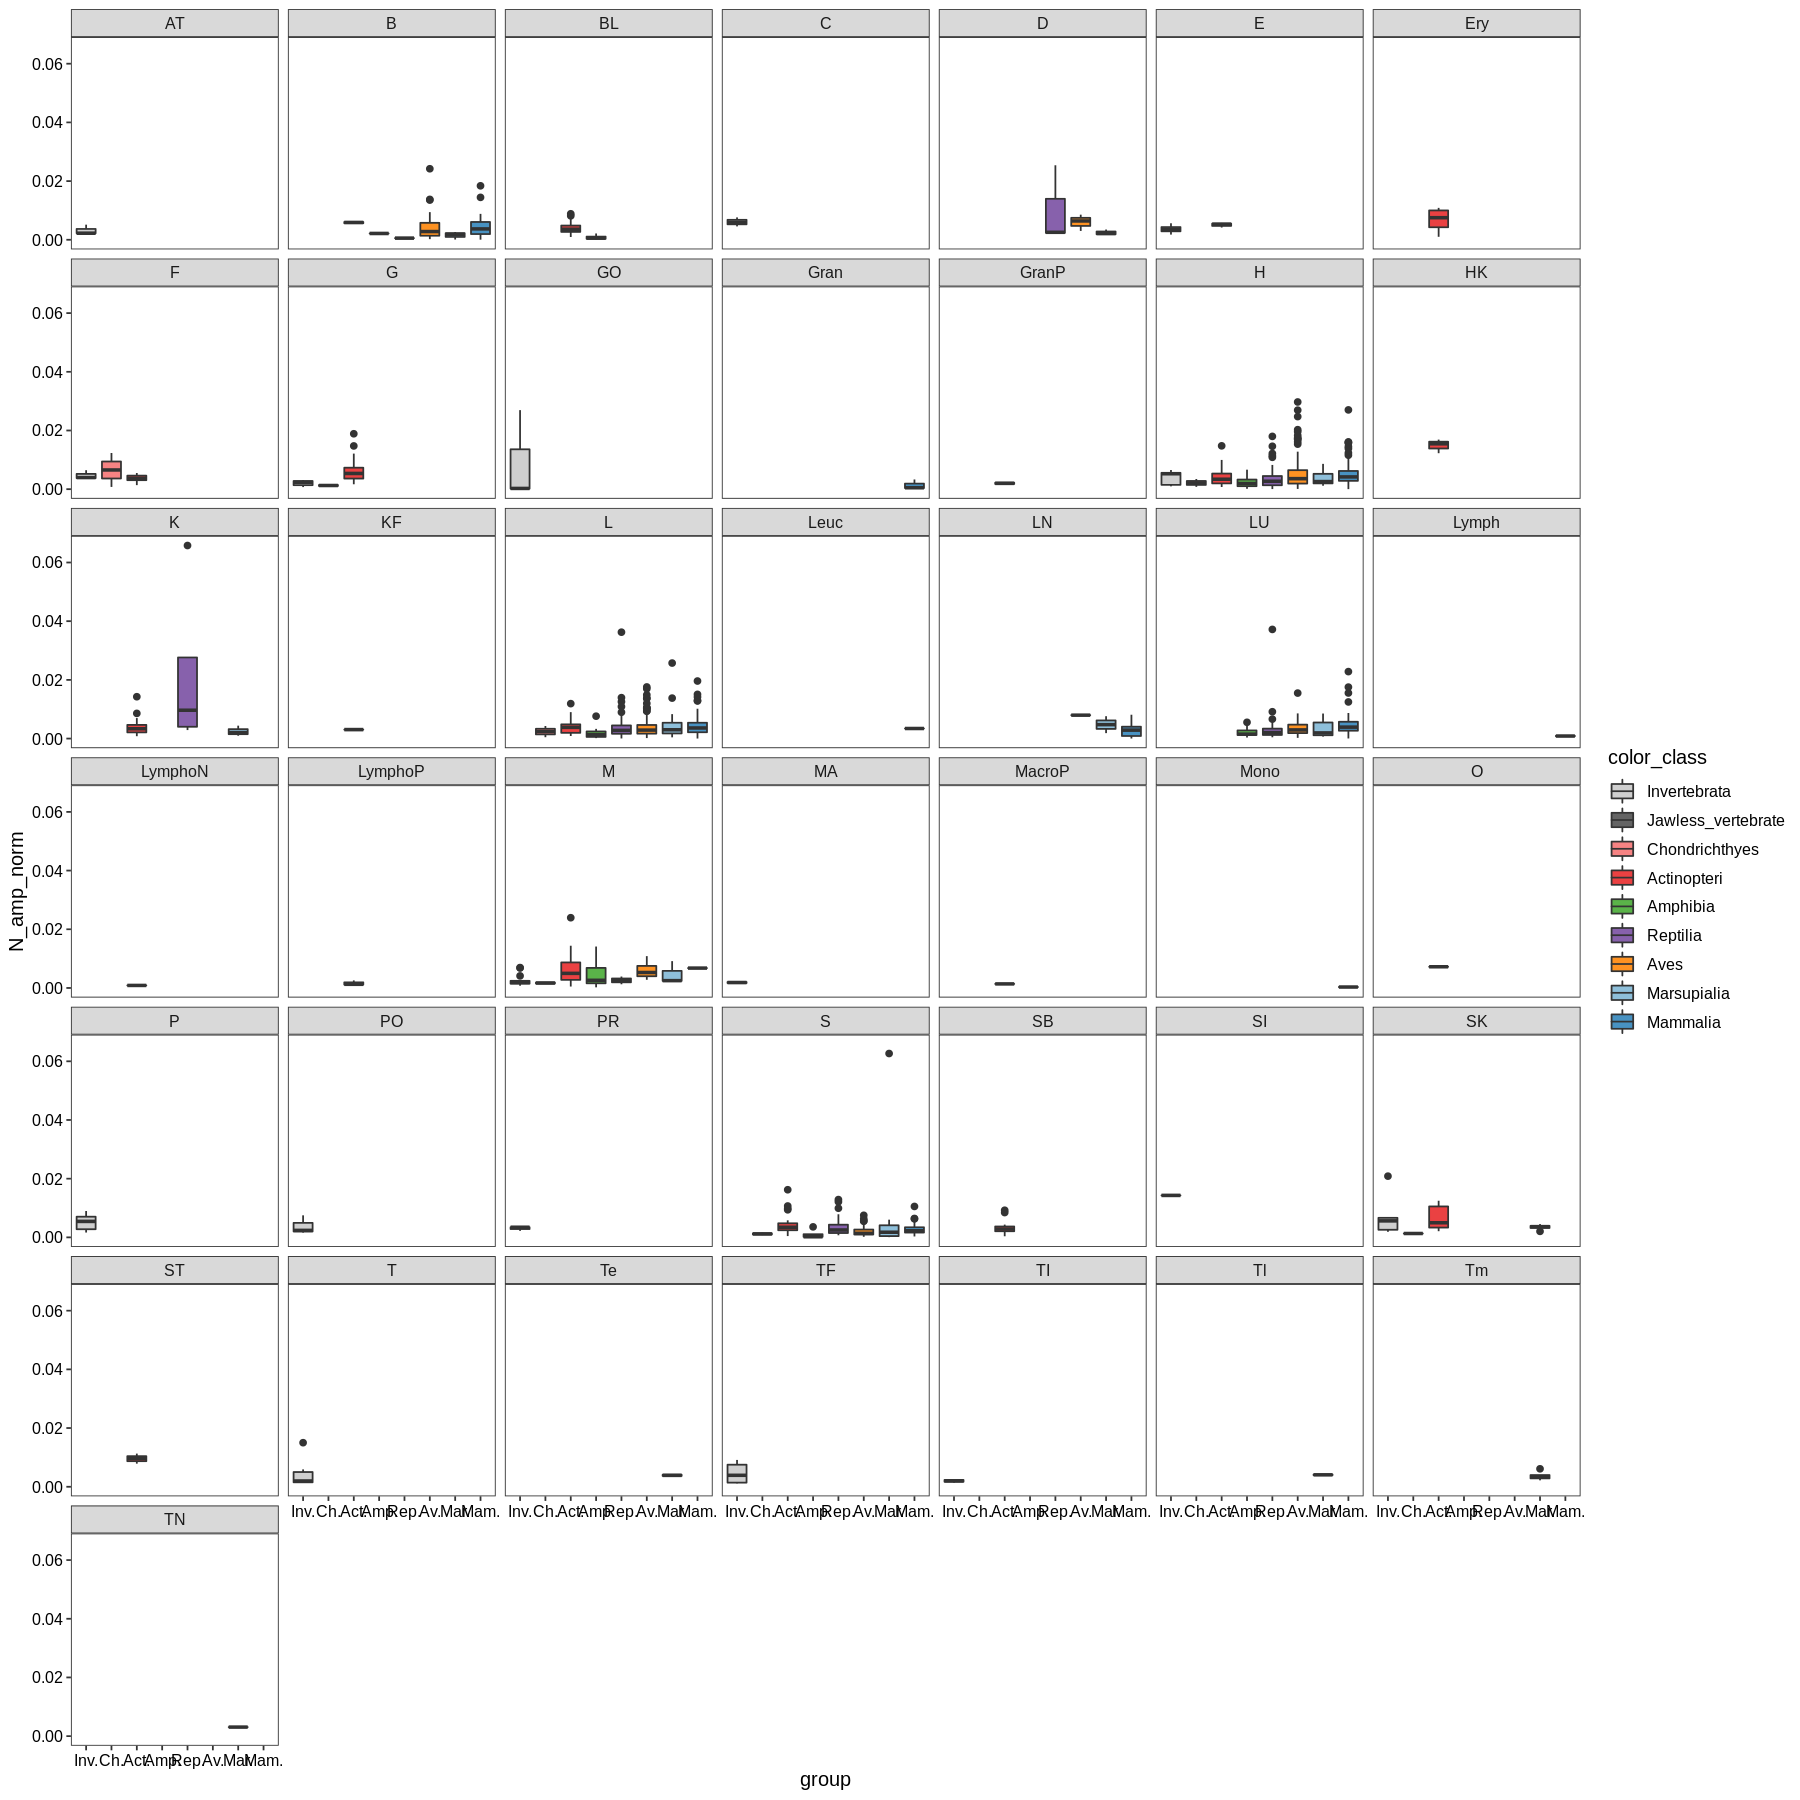

In [158]:
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(coverage_stats_filtered, aes(x = group, y = N_amp_norm,fill = color_class)) + 
    geom_boxplot() + scale_fill_manual(values = class_colors) + facet_wrap(~tissue) 
ggsave("summary/stats_N_amp_per_tissue.pdf", width = 25, height = 25)